In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

100
100


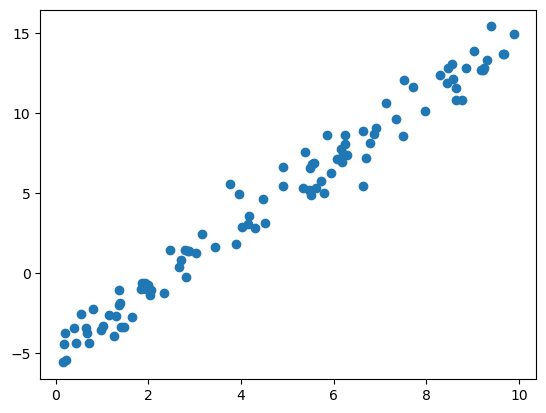

In [2]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100,3)
y = 2 * X[:,0] - 5 + rng.randn(100)
print(len(X))
print(len(y))
plt.scatter(X[:, 0], y)  # Plot first dimension of X against y


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X.reshape(-1, 1), y)


xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(X[:, 0], y)
plt.plot(xfit, yfit)

ValueError: Found input variables with inconsistent numbers of samples: [300, 100]